# Mallado de un cuadarado en 14 triángulos con ángulos agudos

In [2]:
const DNDEBUG =  true
macro c_assert(boolean)
           if DNDEBUG
               :($(esc(boolean)) || error("Assertion $($(QuoteNode(boolean))) failed"))
           end
       end

@c_assert (macro with 1 method)

In [3]:
# Data:
M = 1 # Medida de los catetos del triángulo rectángulo
H = sqrt(M^2+M^2)

α = 2pi/5 # Ángulo de arcos en pentágonos

D = sin(α) + cos(α) + 1/2 
L = (H/2) / D # Lado de pentágono
L1 = L*sin(α)
m=tan(pi/2+α)

println("Datos:\n Catetos: M = $M \n ----------")
println(" Hipotenusa: H = $H")
println(" Lado del pentágono: L = $L ")
@c_assert L1 < H/2
println(" Distancia L1: $L1 ")
println(" Pendiente m: $m")

Datos:
 Catetos: M = 1 
 ----------
 Hipotenusa: H = 1.4142135623730951
 Lado del pentágono: L = 0.40174843658509213 
 Distancia L1: 0.3820854685256421 
 Pendiente m: -0.32491969623290645


In [4]:
reinstall_plot=false
if(reinstall_plot)
    using Pkg
    Pkg.add("PyPlot")
    #Pkg.add("Plots")
end
using PyPlot
#using Plots

 d1 = 0.27647964234664024
Pentágono inferior:
  x = [0.0, 0.45965, 0.64204, 0.35796, 0.0]
  y = [0.0, 0.0, 0.35796, 0.64204, 0.45965]


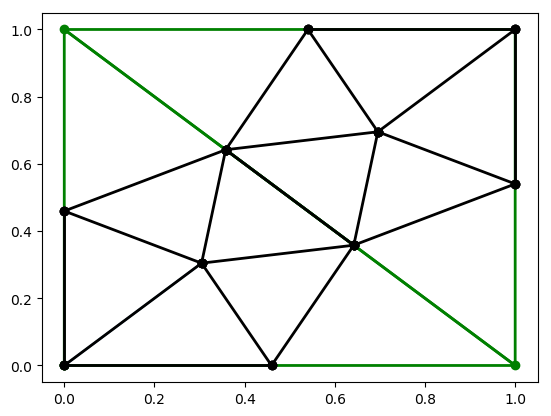

Pentágono superior:
  x = [1.0, 0.54035, 0.35796, 0.64204, 1.0]
  y = [1.0, 1.0, 0.64204, 0.35796, 0.54035]


In [5]:
# Dibujar triángulo
x = Float64[0,0,M,0]
y = Float64[0,M,0,0]
plot(x, y, color="green", linewidth=2, marker="o")
grid()

# Centro del pentágono inscrito
d1 = L1 + m*(H/2 - L1)
println(" d1 = $d1")
D = sqrt(M^2 - (H/2)^2)
d2 = D-d1
xCinf = 1/sqrt(2) * d2
yCinf = xCinf
C=Float64[xCinf,yCinf]
x=[0,C[1]]
y=[0,C[2]]
plot(x,y)


# Vértices extremos a los 4 radios del pentágono
R = L/(2*sin(α/2))
#γ = α - π/4
γ = α - π/2 - π/4
xVertInf = Float64[0]
yVertInf = Float64[0]
for i=0:3
    a = γ + i*α
    xv = xCinf+R*cos(a)
    yv = yCinf+R*sin(a)
    x=[xCinf,xv]
    y=[yCinf,yv]
    push!(xVertInf,xv)
    push!(yVertInf,yv)
end

# Dibujar pentágono 1
colorpenta="black"
for i=1:5
    plot([xCinf, xVertInf[i]], [yCinf, yVertInf[i]], marker="o", color=colorpenta, linewidth=2, label=i) # Radios del pentágono
    if i==5
        plot( [ xVertInf[5], xVertInf[1]], [yVertInf[5], yVertInf[1]], color=colorpenta, marker="o",linewidth=2)
    else
        plot( [ xVertInf[i], xVertInf[i+1]], [yVertInf[i], yVertInf[i+1]], color=colorpenta, marker="o", linewidth=2)
    end
end
#legend()
println("Pentágono inferior:")
println("  x = $xVertInf")
println("  y = $yVertInf")

# Pentágono superior -------------------------------
# Dibujar triángulo

x = Float64[M, M,  0, M]
y = Float64[0, M,  M, 0]
plot(x, y, color="green", linewidth=2)
grid()

xCsup = M-xCinf
yCsup = M-yCinf
xVertSup = zeros(5)
yVertSup = zeros(5)
for i in 1:5
    xVertSup[i] = M-xVertInf[i]
    yVertSup[i] = M-yVertInf[i]
end

# Dibujar pentágono superior
colorpenta="black"
for i=1:5
    plot([xCsup, xVertSup[i]], [yCsup, yVertSup[i]], marker="o", color=colorpenta, linewidth=2, label=i) # Radios del pentágono
    if i==5
        plot( [ xVertSup[5], xVertSup[1]], [yVertSup[5], yVertSup[1]], color=colorpenta, marker="o", linewidth=2)
    else
        plot( [ xVertSup[i], xVertSup[i+1]], [yVertSup[i], yVertSup[i+1]], color=colorpenta, marker="o", linewidth=2)
    end
end
#legend()

println("Pentágono superior:")
println("  x = $xVertSup")
println("  y = $yVertSup")

# Idea 1. Usar vértices del pentágono

### Definimos las coordenadas de los 12 vértices

Se establecerá la siguiente ordenación (en el cuadrado unidad, aunque la figura se represetne (0,0.5)^2):
![](cuadrado_ang_agudos.png)

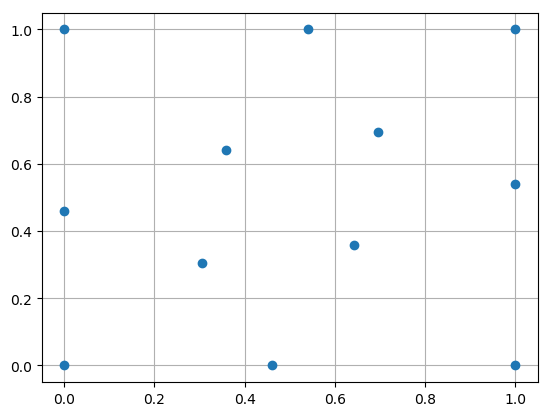

In [6]:
vert = zeros(12,2) # Coordeenadas (x,y)
vert[1,:]  = [0,0]
vert[2,:]  = [xVertInf[2], 0]
vert[3,:]  = [1, 0]
vert[4,:]  = [1, yVertSup[5]]
vert[5,:]  = [1, 1]
vert[6,:]  = [xVertSup[2], 1]
vert[7,:]  = [0, 1]
vert[8,:]  = [0, yVertInf[5]]
vert[9,:]  = [xCinf, yCinf]
vert[10,:] = [xVertInf[3], yVertInf[3]]
vert[11,:] = [xCsup, yCsup,]
vert[12,:] = [xVertInf[4], yVertInf[4]]
plot( vert[:,1], vert[:,2], marker="o", linestyle="")
grid()

#### Prueba de mallado del cuadrado $[0.5,1]\times [1,2]$

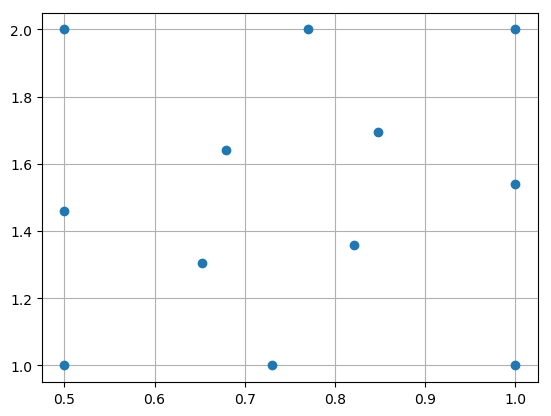

In [7]:
using LinearAlgebra

x₀ = 1/2; y₀=1
x₁ = 1;   y₁=2
Δx = x₁-x₀
Δy = y₁-y₀

Homotecia = Diagonal([ Δx, Δy] )
Traslación = ones(12,2)*Diagonal([x₀, y₀])

vert2 = vert*Homotecia + Traslación
plot( vert2[:,1], vert2[:,2], marker="o", linestyle="")
grid()

# Idea 2. Usar puntos medios de los lados del cuadrado

### Definimos las coordenadas de los 12 vértices

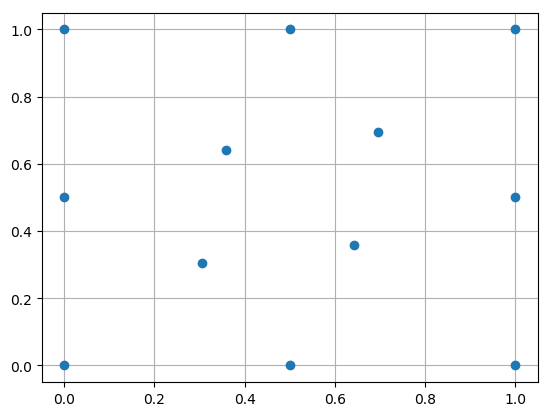

In [8]:
vert = zeros(12,2) # Coordeenadas (x,y)
vert[1,:]  = [0,0]
vert[2,:]  = [1/2, 0]
vert[3,:]  = [1, 0]
vert[4,:]  = [1, 1/2]
vert[5,:]  = [1, 1]
vert[6,:]  = [1/2, 1]
vert[7,:]  = [0, 1]
vert[8,:]  = [0, 1/2]
vert[9,:]  = [xCinf, yCinf]
vert[10,:] = [xVertInf[3], yVertInf[3]]
vert[11,:] = [xCsup, yCsup,]
vert[12,:] = [xVertInf[4], yVertInf[4]]
plot( vert[:,1], vert[:,2], marker="o", linestyle="")
grid()

### Definimos triángulos para el cuadrado de referencia $[0,1]^2$

Cada triángulo es una tupla de enteros (índices de sus 3 vértices)

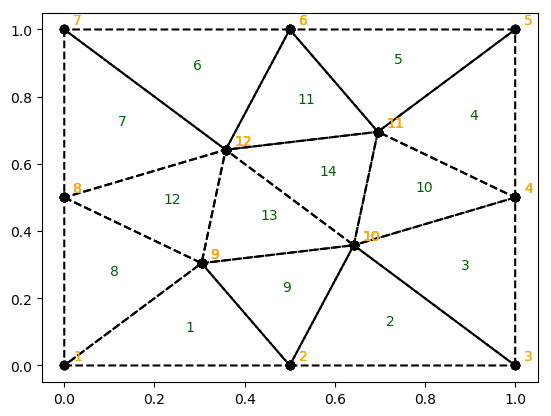

In [9]:
# Int 14x3 array with undefined elements
# Row i contanis indices v1, v2, v3 (of 3 vertices of triangle itr)
tri = Array{Int64}(undef, 14, 3) 
tri[1,1] = 1; tri[1,2] = 2; tri[1,3] = 9
tri[2,1] = 2; tri[2,2] = 3; tri[2,3] = 10
tri[3,1] = 3; tri[3,2] = 4; tri[3,3] = 10
tri[4,1] = 4; tri[4,2] = 5; tri[4,3] = 11
tri[5,1] = 5; tri[5,2] = 6; tri[5,3] = 11

tri[6,1] = 6; tri[6,2] = 7; tri[6,3] = 12
tri[7,1] = 7; tri[7,2] = 8; tri[7,3] = 12
tri[8,1] = 8; tri[8,2] = 9; tri[8,3] = 1
tri[9,1] = 2; tri[9,2] = 9; tri[9,3] = 10
tri[10,1] = 4; tri[10,2] = 10;  tri[10,3] = 11
tri[11,1] = 6; tri[11,2] = 11; tri[11,3] = 12
tri[12,1] = 8; tri[12,2] = 9; tri[12,3] = 12
tri[13,1] = 9; tri[13,2] = 10; tri[13,3] = 12
tri[14,1] = 10; tri[14,2] = 11; tri[14,3] = 12

function xcoor(iVer, coorArray=vert)
    return coorArray[iVer,1]
end

function ycoor(iVer, coorArray=vert)
    return coorArray[iVer,2]
end

function xVertexOfTriang(iTri, coorArray=vert)
    return [ xcoor(tri[iTri, iVer], coorArray) for iVer=1:3 ]
end

function yVertexOfTriang(iTri, coorArray=vert)
    return [ ycoor(tri[iTri, iVer], coorArray) for iVer=1:3 ] 
end

function plotTriangle(iTri, coorArray=vert; annotate_tri=false, annotate_ver=false)
    xlist = xVertexOfTriang(iTri, coorArray); push!( xlist, xcoor(tri[iTri,1], coorArray) )
    ylist = yVertexOfTriang(iTri, coorArray); push!( ylist, ycoor(tri[iTri,1], coorArray) )
    if(annotate_tri)
        xTriang = (xlist[1] + xlist[2] + xlist[3])/3 #xlist[1] + (xlist[3]-xlist[2])/3
        yTriang = (ylist[1] + ylist[2] + ylist[3])/3 #yTriang = ylist[1] + (ylist[3]-ylist[2])/3
        text(xTriang, yTriang, "$iTri", color="darkgreen")
    end
    if(annotate_ver)
        dx = 0.02; dy=0.015
        for i=1:3
            xVer = xlist[i] + dx
            yVer = ylist[i] + dy
            text(xVer, yVer, tri[iTri, i], color="orange")
        end
    end
    plot( xlist, ylist, marker="o", linestyle="--", color="black")
end
for i=1:14
    plotTriangle(i; annotate_tri=true, annotate_ver=true)
end

### Definimos una función para homotecia y traslación del cuadrado unidad

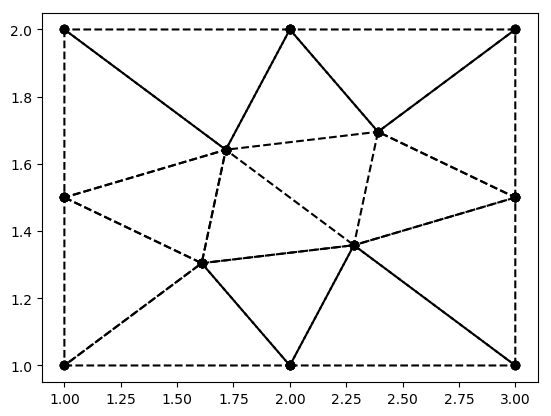

In [10]:
function map_reference_square(x₀, x₁, y₀, y₁, coorArray=vert)
    Δx = x₁-x₀
    Δy = y₁-y₀

    Homotecia = Diagonal([ Δx, Δy] )
    Traslación = ones(12,2)*Diagonal([x₀, y₀])

    resultingCoorArray = coorArray*Homotecia + Traslación
    return resultingCoorArray
end
    
newCoorArray = map_reference_square(1, 3, 1, 2) # [0,1]^2 -> [1,3]x[1,2]
for i=1:13 
    plotTriangle(i, newCoorArray)
end

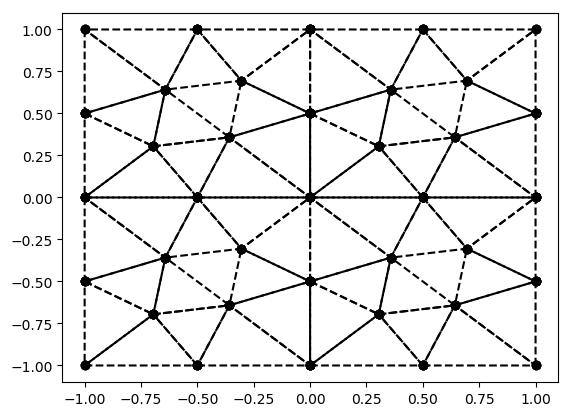

In [11]:

newCoorArray = map_reference_square(-1,0, -1, 0)
for i=1:13 
    plotTriangle(i, newCoorArray)
end
newCoorArray = map_reference_square(0, 1, -1, 0) 
for i=1:13 
    plotTriangle(i, newCoorArray)
end
newCoorArray = map_reference_square(-1, 0, 0, 1) 
for i=1:13 
    plotTriangle(i, newCoorArray)
end
newCoorArray = map_reference_square(0, 1, 0, 1)
for i=1:13 
    plotTriangle(i, newCoorArray)
end

### Definimos una función para mallar un cuadrado usando $(14n)^2$ triángulos agudos

La función grabará el resultado en un fichero freefem cuyo nombre se pasa como parámetro

In [12]:
"""
Return 12x2 coordinate array for the vertex laying in acute triangles 
in an square whose left lower vertex is in (x0,y0)
"""
function global_coor_array(x0,y0)
    global_vert = zeros(12,2) # Coordeenadas (x,y)
    for i=14
        global_vert[i,:] =  [x0,y0] + vert[i,:]
    end
    global_vert[5,:] =  [x0,y0] + vert[11,:]
    return global_vert
end
#global_coor = global_coor_array(1,0)

global_coor_array

In [13]:
"""
Write mesh to Triangle file format.

Specificaly, mesh is saved to a .poly file, containing the set of vertices 
and the set of segments connecting pairs of vertices.

See 
    [1] https://www.cs.cmu.edu/~quake/triangle.html, 
    [2] https://www.cs.cmu.edu/~quake/triangle.poly.html
"""
function save_triangle_mesh(vertex_coor, tri_indices, filename)
    n_nodes = size(vertex_coor)[1]
    n_ele = size(tri_indices)[1]
    
    # Define segments connecting pairs of vertices
    edges=Set()
    for i=1:n_ele
        #println("i: $i, $(tri[i,:])")
        push!( edges, sort([tri[i,1], tri[i,2]]) )
        push!( edges, sort([tri[i,1], tri[i,3]]) )
        push!( edges, sort([tri[i,2], tri[i,3]]) )
        #println("  $edges")
    end
    n_edge= length(edges) 
    dim = 2
    n_attributes = 0
    n_boundary_markers = 1
    n_holes=0
    boundary_marker = 1
    
    open(filename, "w") do f
        println("Saving mesh to $filename")
        write(f, "$n_nodes $dim $n_attributes $n_boundary_markers\n\n")
        for i=1:n_nodes
            write(f, "$i $(vertex_coor[i,1]) $(vertex_coor[i,2])\n")
        end
        write(f, "\n")
        i = 1
        for e in edges
            write(f, "$i $(e[1]) $(e[2])\n")
            i = i+1
        end    
        write(f, "\n$n_holes\n")
    end
end

save_triangle_mesh

In [14]:
#using Pkg
#Pkg.add("StatsBase")
using StatsBase
function save_freefem_mesh(vertex_coor, tri_indices, filename)
    # Write FreeFem++ .msh file
    boundary_label = 1 # See FreeFem++ manual, table 5.1
    region_label = 0 # See FreeFem++ manual, table 5.1

    n_nodes = size(vertex_coor)[1]
    n_ele = size(tri_indices)[1]
    
    edge_list = []
    for i=1:n_ele
        #println("i: $i, $(tri[i,:])")
        push!( edge_list, sort([tri[i,1], tri[i,2]]) )
        push!( edge_list, sort([tri[i,1], tri[i,3]]) )
        push!( edge_list, sort([tri[i,2], tri[i,3]]) )
        #println("  $edges")
    end
    edges = countmap([e for e in edge_list]) # Generate dictionary e=>n
    n_edge = length(edges)
    
    open(filename, "w") do f
        write(f, "$n_nodes $n_ele $n_edge\n\n")
        for i=1:n_nodes
            write(f, "$(vertex_coor[i,1]) $(vertex_coor[i,2]) $boundary_label\n")
        end
        write(f, "\n")
        for i=1:n_ele
            write(f, "$(tri_indices[i,1]) $(tri_indices[i,2]) $(tri_indices[i,3]) $region_label\n")
        end
        write(f, "\n")
        for e in keys(edges)
            boundary_label = 2-edges[e] # If edge is in two triangles, mark as 0
            # println("Edge $e, boundary_label = $boundary_label")
            write(f, "$(e[1]) $(e[2]) $boundary_label\n")
        end
        
    end

end
   

save_freefem_mesh (generic function with 1 method)

In [15]:
                 
"""
Buld an acute mesh, composed of m rows x n columns of squares.

Each square is a macroelements, containing 14 triangles with acute angles.
"""
function acute_mesh(m, n; x₀=0, x₁=1, y₀=0, y₁=1, debug=false)
    nt = 14*n*m # Number of triangles
    
    n_horiz_ver = 2*n+1 # Number of vertices in each horizontal line of the "skeleton"
    n_interior_ver = 5*n+1 # Number of vertices in the interior of each "layer" of macroelements
    nv = n_horiz_ver*(m+1) + n_interior_ver*m
    if(debug)
        println("Number of triangles: $nt. Number of vertices: $nv")
    end
    
    dim=2
    vcoor = zeros(nv,dim) # (x,y) coordinates of each vertex
    Δx = x₀ + (x₁-x₀)/n
    Δy = y₀ + (y₁-y₀)/m

    # 1) Define coordinates of all the vertices in the mesh
    # --------------------------------------------------------------------------------------
    
    # a) Coordinates of vertices laying on top and bottom horizontal lines of macroelements
    iVer=1 # Index of current vertex
    for i=0:m
        # Add two vertices for each column
        for j=0:n-1
            x0 = j*Δx
            y0 = i*Δy
            vcoor[iVer,:]=[x0, y0]; iVer=iVer+1 
            vcoor[iVer,:]=[x0+Δx/2, y0]; iVer=iVer+1 
        end
        # And a final vertex
        x0 = n*Δx
        y0 = i*Δy
        vcoor[iVer,:]=[x0, y0]; iVer=iVer+1
    end
    if(debug)
        println("Defined top and bootom horizontal lines of coordinates. Strting middle at iVer=$iVer")
    end
    # b) Coordinates of vertices laying on horizontal middle of macroelements
    for i=0:m-1
        for j=0:n-1
            x0 = j*Δx
            y0 = i*Δy
            vcoor[iVer,:] = [x0, y0+Δy/2]; iVer=iVer+1 #1
            vcoor[iVer,:] = [x0 + xCinf*Δx, y0 + yCinf*Δy]; iVer=iVer+1 #2
            vcoor[iVer,:] = [x0 + xVertInf[3]*Δx, y0 + yVertInf[3]*Δy]; iVer=iVer+1 #3
            vcoor[iVer,:] = [x0 + xVertInf[4]*Δx, y0 + yVertInf[4]*Δy]; iVer=iVer+1 #4
            vcoor[iVer,:] = [x0 + xCsup*Δx, y0 + yCsup*Δy]; iVer=iVer+1 #5
        end
        x0 = n*Δx
        y0 = i*Δy
        vcoor[iVer,:] = [x0, y0+Δy/2]; iVer=iVer+1 #6
    end
    
    # 2) Define indices of vertices for each triangle
    # --------------------------------------------------------------------------------------

    tri = Array{Int64}(undef, nt, 3)
    iTri = 1 # Index of current triangle
 
    for i=1:m
        i_bot = (i-1)*n_horiz_ver # First index of bottom vertices in a row of macroelements
        i_top = i*n_horiz_ver # 1st index top vertices in a row of macroelem.
        i_mid = n_horiz_ver*(m+1) + n_interior_ver*(i-1) # 1st index of vertices in the interior of a row
        # println("m: $m, n: $n, i: $i, n_horiz_ver: $n_horiz_ver, n_interior_ver: $n_interior_ver, i_mid: $i_mid")
        for j=1:n
            tri[iTri,:] = [i_bot+1, i_bot+2, i_mid+2]; iTri=iTri+1 #1
            tri[iTri,:] = [i_bot+2, i_bot+3, i_mid+3]; iTri=iTri+1 #2
            tri[iTri,:] = [i_bot+3, i_mid+6, i_mid+3]; iTri=iTri+1 #3
            tri[iTri,:] = [i_mid+5, i_mid+6, i_top+3]; iTri=iTri+1 #4
            tri[iTri,:] = [i_top+3, i_top+2, i_mid+5]; iTri=iTri+1 #5
            tri[iTri,:] = [i_top+2, i_top+1, i_mid+4]; iTri=iTri+1 #6
            tri[iTri,:] = [i_top+1, i_mid+1, i_mid+4]; iTri=iTri+1 #7
            tri[iTri,:] = [i_mid+1, i_bot+1, i_mid+2]; iTri=iTri+1 #8
            tri[iTri,:] = [i_bot+2, i_mid+3, i_mid+2]; iTri=iTri+1 #9
            tri[iTri,:] = [i_mid+3, i_mid+6, i_mid+5]; iTri=iTri+1 #10
            tri[iTri,:] = [i_mid+5, i_top+2, i_mid+4]; iTri=iTri+1 #11
            tri[iTri,:] = [i_mid+4, i_mid+1, i_mid+2]; iTri=iTri+1 #12
            tri[iTri,:] = [i_mid+2, i_mid+3, i_mid+4]; iTri=iTri+1 #13
            tri[iTri,:] = [i_mid+3, i_mid+5, i_mid+4]; iTri=iTri+1 #14
            
            i_bot = i_bot+2
            i_top = i_top+2
            i_mid = i_mid+5
        end
        
    end
    
    return vcoor, tri
end


acute_mesh

### Save and plot mesh

Number of triangles: 224. Number of vertices: 129
Defined top and bootom horizontal lines of coordinates. Strting middle at iVer=46


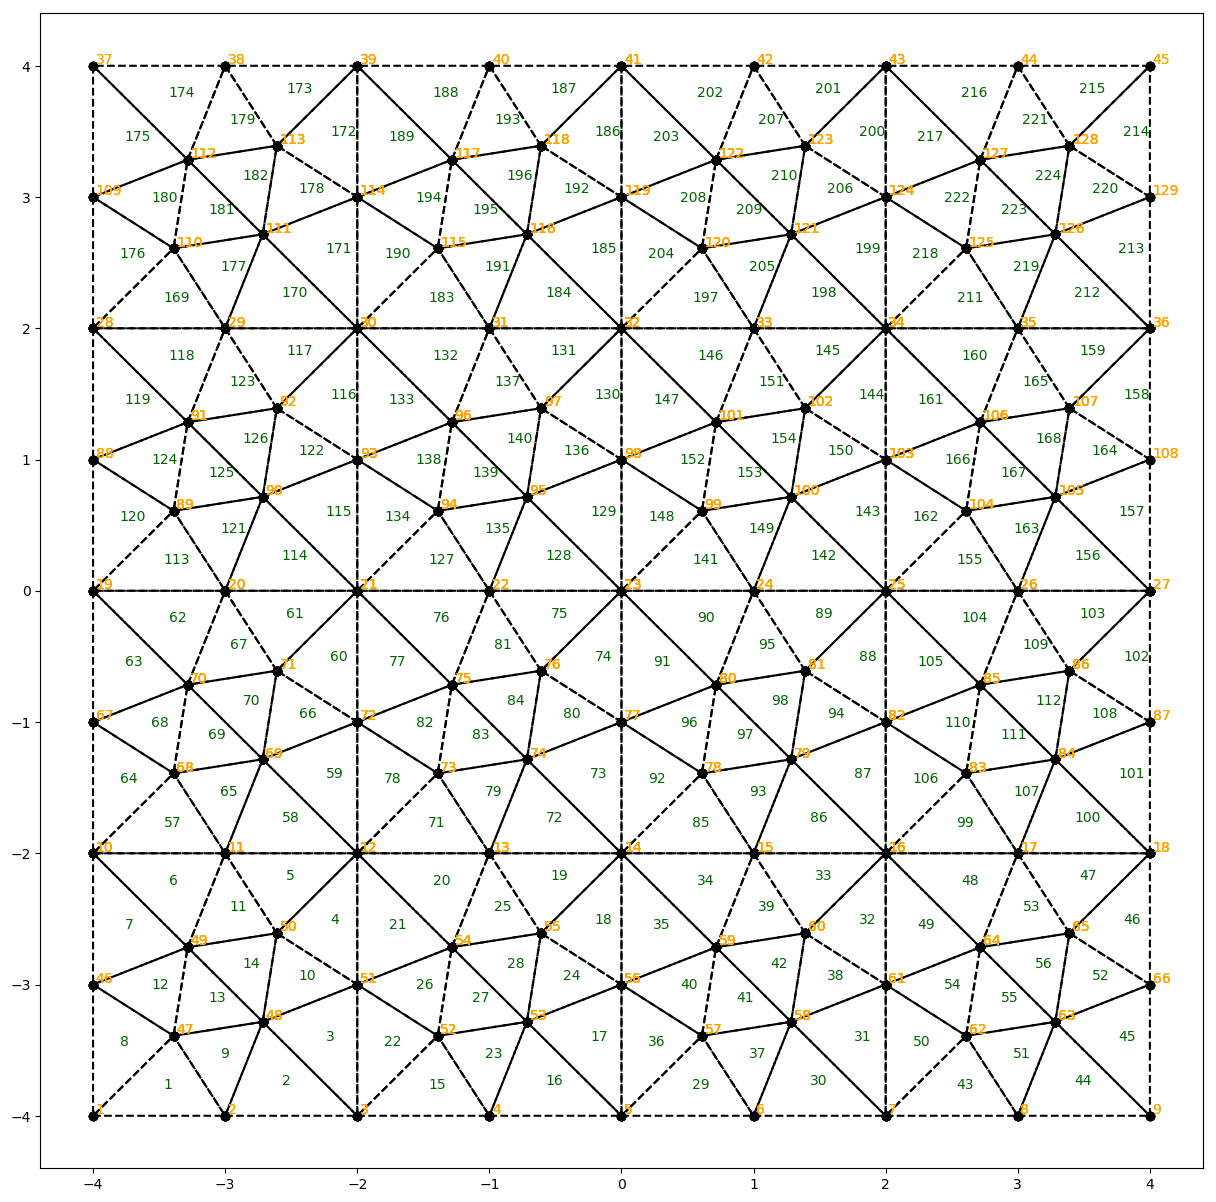

Saving mesh to 'acute_mesh.msh'


In [29]:
m=4; n=4
vertex_coord, tri = acute_mesh(m, n, debug=true)

ax=-2; bx=2  # x-interval [ax, bx]; y-interval = x-interval
vertex_coord = (bx-ax)*vertex_coord + ax*ones(size(vertex_coord))

figure(figsize=(15,15))
plot_triangles=true
if(plot_triangles)
    for i=1:14*m*n
        plotTriangle(i, vertex_coord, annotate_tri=true, annotate_ver=true)
    end
end

output_file = "acute_mesh.msh"
println("Saving mesh to '$output_file'")
save_freefem_mesh(vertex_coord, tri, output_file)
#    save_triangle_mesh(vcoor, tri, output_file * ".poly")


### Save mesh to .poly file